In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [3]:
# Leer data
data = pd.read_csv(r'..\data\processed\processed.csv', index_col=0)

In [4]:
# # Retrasar 'Return' una posición y eliminar última fila
# data['Forward_Return'] = data['Return'].shift(-1)
# data.drop(index=data.index[-1], inplace=True)

In [5]:
# Sustituir los NaN por 0s
data.fillna(0, inplace=True)

In [6]:
# Dividir data en train y test
split_index = (int(len(data)*0.8))

data_train = data.iloc[:split_index]
data_test = data.iloc[split_index:]

In [7]:
# Guardar CSVs
data_train.to_csv(r'..\data\train\train.csv')
data_test.to_csv(r'..\data\test\test.csv')

In [8]:
data = pd.read_csv(r'..\data\train\train.csv', index_col=0)

In [9]:
X = data.drop('Return', axis=1)
y = data['Return']

print(X.shape)
print(y.shape)

(11041, 17)
(11041,)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Decision Tree Regressor

In [10]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [11]:
# Guardar modelo
with open(r'..\models\dtr_trained.pkl', 'wb') as f:
    pickle.dump(tree_reg, f)

In [12]:
y_pred = tree_reg.predict(X_test)

print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 0.15123831635977047
MAE 0.0020439250644831235
MAPE 8567793318.808933
MSE 1.0383368549867291e-05
RMSE 0.003222323470706703


In [13]:
# Obtener las importancias de las características
importancias = tree_reg.feature_importances_

# Obtener los nombres de las columnas del conjunto de datos
nombres_columnas = X_train.columns

# Crear un DataFrame con las importancias y los nombres de las columnas
importancias_df = pd.DataFrame({'Característica': nombres_columnas, 'Importancia': importancias})

# Ordenar el DataFrame por la importancia en orden descendente
importancias_df = importancias_df.sort_values('Importancia', ascending=False)

# Imprimir el resultado
print(importancias_df)

   Característica  Importancia
10     Derivada_8     0.668807
3           Close     0.063799
16            ATR     0.061912
12    Derivada_30     0.060608
2             Low     0.044041
0            Open     0.033645
9          MA_200     0.024418
14   Derivada_100     0.017202
15   Derivada_200     0.013271
6           MA_30     0.007295
1            High     0.005003
7           MA_50     0.000000
5           MA_21     0.000000
11    Derivada_21     0.000000
4            MA_8     0.000000
13    Derivada_50     0.000000
8          MA_100     0.000000


### 2. Random Forest Regressor

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(random_state=42)

parameters = {"max_depth":list(range(1,15)),
              "criterion": ['absolute_error'],
              "min_samples_split": [2],
              "min_samples_leaf": [2],
              "max_features": [17]
}

dtr_gs = GridSearchCV(model, parameters, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1, verbose=2)

In [15]:
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


In [ ]:
dtr_gs.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=6, max_features=17,
                      min_samples_leaf=2, random_state=42)

In [ ]:
# Guardar modelo
with open(r'..\models\rfr_trained.pkl', 'wb') as f:
    pickle.dump(dtr_gs.best_estimator_, f)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

y_pred = dtr_gs.best_estimator_.predict(X_test)

print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 0.13960676299659913
MAE 0.002005501752555386
MAPE 5738319527.273593
MSE 1.0525663740266638e-05
RMSE 0.0032443279335274723


In [ ]:
# Obtener las importancias de las características
importancias = dtr_gs.best_estimator_.feature_importances_

# Obtener los nombres de las columnas del conjunto de datos
nombres_columnas = X_train.columns

# Crear un DataFrame con las importancias y los nombres de las columnas
importancias_df = pd.DataFrame({'Característica': nombres_columnas, 'Importancia': importancias})

# Ordenar el DataFrame por la importancia en orden descendente
importancias_df = importancias_df.sort_values('Importancia', ascending=False)

# Imprimir el resultado
print(importancias_df)

   Característica  Importancia
10     Derivada_8     0.510443
16            ATR     0.071878
12    Derivada_30     0.059198
0            Open     0.056949
13    Derivada_50     0.054251
14   Derivada_100     0.045699
11    Derivada_21     0.036462
15   Derivada_200     0.033573
3           Close     0.030778
1            High     0.020161
2             Low     0.017819
9          MA_200     0.015470
7           MA_50     0.010938
8          MA_100     0.010384
4            MA_8     0.009258
6           MA_30     0.008518
5           MA_21     0.008223


### 3. Regresión lineal

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Guardar modelo
with open(r'..\models\lr_trained.pkl', 'wb') as f:
    pickle.dump(linreg, f)

In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 0.9408013113847548
MAE 0.00027753310605717135
MAPE 1880637458.6253276
MSE 7.242101209430583e-07
RMSE 0.0008510053589390952


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train_scal, y_train)

LinearRegression()

In [ ]:
y_pred = linreg.predict(X_test_scal)

In [ ]:
print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 0.940801311384755
MAE 0.0002775331060571739
MAPE 1880637458.6274333
MSE 7.242101209430551e-07
RMSE 0.0008510053589390933


### 4. SVM

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_train_scal, y_train)

LinearSVR(epsilon=1.5, random_state=42)

In [ ]:
# Guardar modelo
with open(r'..\models\svm_trained.pkl', 'wb') as f:
    pickle.dump(svm_reg, f)

In [ ]:
y_pred = svm_reg.predict(X_test_scal)

In [ ]:
print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 -6.504334265078349e-05
MAE 0.0021343539872587846
MAPE 0.9959239130434783
MSE 1.2234345775754066e-05
RMSE 0.003497762967348426


In [ ]:
from sklearn.svm import LinearSVR

svm_reg_2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg_2.fit(X_train_scal, y_train)

LinearSVR(epsilon=0.5, random_state=42)

In [ ]:
y_pred = svm_reg_2.predict(X_test_scal)

In [ ]:
print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 -6.504334265078349e-05
MAE 0.0021343539872587846
MAPE 0.9959239130434783
MSE 1.2234345775754066e-05
RMSE 0.003497762967348426


### 5. ARIMA

In [11]:
X = data['Close'].values
train = X[:int(len(data)*0.8)]
test = X[int(len(data)*0.8):]

In [12]:
X

array([13884.25, 13882.5 , 13866.75, ..., 11282.5 , 11226.5 , 11187.5 ])

In [13]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA

In [14]:
model_ar = ARIMA(order=(13,0,0))
model_ar.fit(train)

ARIMA(order=(13, 0, 0))

In [15]:
# Guardar modelo
with open(r'..\models\ar_trained.pkl', 'wb') as f:
    pickle.dump(model_ar, f)

In [14]:
y_pred = model_ar.predict(len(test))

In [18]:
print("R2", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 -14133102877377.273
MAE 13148.996517751402
MAPE 2.4158469731357968e+17
MSE 172898021.6208866
RMSE 13149.069230211186


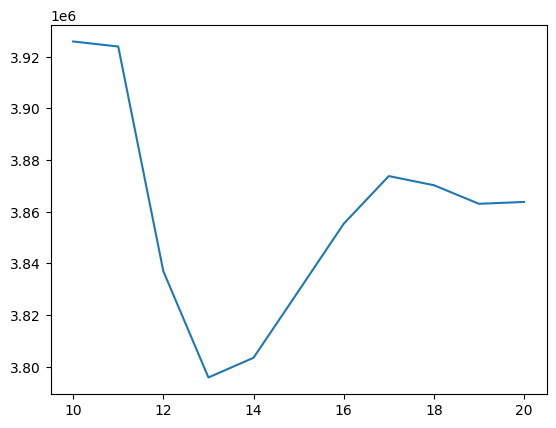

In [20]:
lags = []
mse = []
for lag in range(10, 21):
    try:
        model_ar = ARIMA(order=(lag, 0, 0))
        model_ar.fit(train)
        lags.append(lag)
        predictions = model_ar.predict(len(test))
        mse.append(mean_squared_error(test, predictions))
    except:
        continue
    
plt.plot(lags, mse);